# Análise exploratória dos dados

### Importando as bibliotecas


In [1]:
import numpy as np
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

### Garantindo que o diretório de trabalho está correto

In [2]:
base_dir = os.path.dirname(os.path.abspath('__file__'))
dir_files_path = os.path.join(base_dir, '../data/raw/2016.csv')
reports_file_path = os.path.join(base_dir, '../reports/2016')

### Dataframes

#### Após ler o dicionário de dados, percebi que estas 3 bases são as mais relevantes para o estudo.

In [20]:
licitacoes_2016 = pd.read_csv(f"{dir_files_path}/licitacao.csv")
lotes_2016 = pd.read_csv(f"{dir_files_path}/lote.csv")
itens_2016 = pd.read_csv(f"{dir_files_path}/item.csv")

### Relatórios de análise exploratória

#### começando pela base de licitações

In [4]:
licitacoes_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30466 entries, 0 to 30465
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_ORGAO                     30466 non-null  int64  
 1   NM_ORGAO                     30466 non-null  object 
 2   NR_LICITACAO                 30466 non-null  float64
 3   ANO_LICITACAO                30466 non-null  int64  
 4   CD_TIPO_MODALIDADE           30466 non-null  object 
 5   NR_COMISSAO                  21922 non-null  float64
 6   ANO_COMISSAO                 21922 non-null  float64
 7   TP_COMISSAO                  21922 non-null  object 
 8   NR_PROCESSO                  30466 non-null  object 
 9   ANO_PROCESSO                 30466 non-null  int64  
 10  TP_OBJETO                    30466 non-null  object 
 11  CD_TIPO_FASE_ATUAL           30466 non-null  object 
 12  TP_LICITACAO                 30466 non-null  object 
 13  TP_NIVEL_JULGAME

In [5]:
licitacoes_2016.isna().sum()

CD_ORGAO                  0
NM_ORGAO                  0
NR_LICITACAO              0
ANO_LICITACAO             0
CD_TIPO_MODALIDADE        0
                      ...  
BL_GERA_DESPESA           0
DS_OBSERVACAO         28873
PC_TX_ESTIMADA        30465
PC_TX_HOMOLOGADA      30465
BL_COMPARTILHADA          0
Length: 61, dtype: int64

In [21]:
# Tratando os valores nulos para colunas numéricas
licitacoes_2016[licitacoes_2016.select_dtypes(include = ['float64', 'int64']).columns] = licitacoes_2016[licitacoes_2016.select_dtypes(include = ['float64', 'int64']).columns].fillna(0)

In [22]:
# Tratando os valores nulos para colunas categóricas
licitacoes_2016[licitacoes_2016.select_dtypes(include = ['object']).columns] = licitacoes_2016[licitacoes_2016.select_dtypes(include = ['object']).columns].fillna('Não informado')


In [8]:
# Checando se ainda há valores nulos
licitacoes_2016.isna().sum()

CD_ORGAO              0
NM_ORGAO              0
NR_LICITACAO          0
ANO_LICITACAO         0
CD_TIPO_MODALIDADE    0
                     ..
BL_GERA_DESPESA       0
DS_OBSERVACAO         0
PC_TX_ESTIMADA        0
PC_TX_HOMOLOGADA      0
BL_COMPARTILHADA      0
Length: 61, dtype: int64

In [9]:
# licitacoes
report_licitacoes = sv.analyze(licitacoes_2016)
report_licitacoes.show_html(filepath=f"{reports_file_path}/licitacoes_report.html", layout='vertical')

                                             |          | [  0%]   00:00 -> (? left)

Report /home/vlgi/Área de Trabalho/meus_projetos/dsb/dsb/notebooks/../reports/2016/licitacoes_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Agora, a base de itens

In [48]:
itens_2016.shape # (456368, 32)

(456368, 32)

In [49]:
itens_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456368 entries, 0 to 456367
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CD_ORGAO                        456368 non-null  int64  
 1   NR_LICITACAO                    456368 non-null  float64
 2   ANO_LICITACAO                   456368 non-null  int64  
 3   CD_TIPO_MODALIDADE              456368 non-null  object 
 4   NR_LOTE                         456368 non-null  int64  
 5   NR_ITEM                         456368 non-null  int64  
 6   NR_ITEM_ORIGINAL                456368 non-null  object 
 7   DS_ITEM                         456368 non-null  object 
 8   QT_ITENS                        456368 non-null  float64
 9   SG_UNIDADE_MEDIDA               456368 non-null  object 
 10  VL_UNITARIO_ESTIMADO            447196 non-null  float64
 11  VL_TOTAL_ESTIMADO               447196 non-null  float64
 12  DT_REF_VALOR_EST

##### A coluna VL_TOTAL_HOMOLOGADO não consta no dicionário de dados apresentado e nem no site da transparência, além de ser de um tipo que não condiz com os demais valores da coluna. Vou tratar o dado para verificar o report, mas acredito que não seja um dado relevante para o estudo, pois é a multiplicação de duas colunas que constam no dicionário de dados.

In [50]:
itens_2016[['QT_ITENS','VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO']].isna().sum()

QT_ITENS                      0
VL_UNITARIO_HOMOLOGADO    83395
VL_TOTAL_HOMOLOGADO       83395
dtype: int64

In [23]:
# Tratando possíveis problemas com os valores em reais
itens_2016['VL_TOTAL_HOMOLOGADO'] = itens_2016['VL_TOTAL_HOMOLOGADO'].str.replace(',','.')
itens_2016['VL_TOTAL_HOMOLOGADO'] = itens_2016['VL_TOTAL_HOMOLOGADO'].str.replace('R$','')

In [24]:
# Forçando a conversão para float
itens_2016['VL_TOTAL_HOMOLOGADO'] = pd.to_numeric(itens_2016['VL_TOTAL_HOMOLOGADO'], errors='coerce')

In [25]:
# Preenchendo os valores nulos com 0
itens_2016[['VL_UNITARIO_HOMOLOGADO','VL_TOTAL_HOMOLOGADO']] = itens_2016[['VL_UNITARIO_HOMOLOGADO','VL_TOTAL_HOMOLOGADO']].fillna(0)

In [26]:
# Checando se ainda há valores nulos
itens_2016[['VL_UNITARIO_HOMOLOGADO','VL_TOTAL_HOMOLOGADO']].isnull().sum()

VL_UNITARIO_HOMOLOGADO    0
VL_TOTAL_HOMOLOGADO       0
dtype: int64

In [27]:
# Convertendo os valores para float
itens_2016['VL_TOTAL_HOMOLOGADO'] = itens_2016['VL_TOTAL_HOMOLOGADO'].astype(float)

##### Agora, faremos o mesmo tratamento de dados para o preenchimento dos valores nulos

In [28]:
# para colunas numéricas
itens_2016[itens_2016.select_dtypes(include = ['float64', 'int64']).columns] = itens_2016[itens_2016.select_dtypes(include = ['float64', 'int64']).columns].fillna(0)

In [29]:
# para colunas categóricas
itens_2016[itens_2016.select_dtypes(include = ['object']).columns] = itens_2016[itens_2016.select_dtypes(include = ['object']).columns].fillna('Não informado')

In [58]:
# Checando se ainda há valores nulos
itens_2016.isna().sum()

CD_ORGAO                          0
NR_LICITACAO                      0
ANO_LICITACAO                     0
CD_TIPO_MODALIDADE                0
NR_LOTE                           0
NR_ITEM                           0
NR_ITEM_ORIGINAL                  0
DS_ITEM                           0
QT_ITENS                          0
SG_UNIDADE_MEDIDA                 0
VL_UNITARIO_ESTIMADO              0
VL_TOTAL_ESTIMADO                 0
DT_REF_VALOR_ESTIMADO             0
PC_BDI_ESTIMADO                   0
PC_ENCARGOS_SOCIAIS_ESTIMADO      0
CD_FONTE_REFERENCIA               0
DS_FONTE_REFERENCIA               0
TP_RESULTADO_ITEM                 0
VL_UNITARIO_HOMOLOGADO            0
VL_TOTAL_HOMOLOGADO               0
PC_BDI_HOMOLOGADO                 0
PC_ENCARGOS_SOCIAIS_HOMOLOGADO    0
TP_ORCAMENTO                      0
CD_TIPO_FAMILIA                   0
CD_TIPO_SUBFAMILIA                0
TP_DOCUMENTO                      0
NR_DOCUMENTO                      0
TP_DOCUMENTO.1              

In [29]:
#itens
report_itens = sv.analyze(itens_2016)
report_itens.show_html(filepath=f"{reports_file_path}/itens_report.html", layout= 'vertical')

                                             |          | [  0%]   00:00 -> (? left)

TypeError: 

Column [NR_DOCUMENTO.1] has a 'mixed' inferred_type (as determined by Pandas).
This is is not currently supported; column types should not contain mixed data.
e.g. only floats or strings, but not a combination.

POSSIBLE RESOLUTIONS:
BEST -> Make sure series [NR_DOCUMENTO.1] only contains a certain type of data (numerical OR string).
OR -> Convert series [NR_DOCUMENTO.1] to a string (if makes sense) so it will be picked up as CATEGORICAL or TEXT.
     One way to do this is:
     df['NR_DOCUMENTO.1'] = df['NR_DOCUMENTO.1'].astype(str)
OR -> Convert series [NR_DOCUMENTO.1] to a numerical value (if makes sense):
     One way to do this is:
     df['NR_DOCUMENTO.1'] = pd.to_numeric(df['NR_DOCUMENTO.1'], errors='coerce')
     # (errors='coerce' will transform string values to NaN, that can then be replaced if desired; consult Pandas manual pages for more details)


#### Levando em conta que a coluna apresentada no erro anterior também não está no dicionário de dados, vou ignorá-la em conjunto  com qualquer outra para gerar o report

In [32]:
#itens
report_itens = sv.analyze(itens_2016.drop(columns=['NR_DOCUMENTO.1']))
report_itens.show_html(filepath=f"{reports_file_path}/itens_report.html", layout= 'vertical')

                                             |          | [  0%]   00:00 -> (? left)

Report /home/vlgi/Área de Trabalho/meus_projetos/dsb/dsb/notebooks/../reports/2016/itens_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Por meio dos reports, é possível fazer um diagnóstico inicial dos dataframes e identificar possíveis respostas para as perguntas de negócio. Como por exemplo:
<ul>
<li>Distribuição de frequência das variáveis categóricas</li>
<li>Valores mais frequentes</li>
<li>Relação de incerteza entre as features. Ou seja, o quanto uma coluna pode dar de informação sobre a outra</li>
</ul>



## Agora, iremos começar pelas bases recomendadas e depois tentar relacionar com as demais com o objetivo de adquirir mais informações e por fim responder às perguntas de negócio.

In [30]:
# licitacoes filtradas pelo tipo de objeto - compra
filtro = licitacoes_2016['TP_OBJETO'].str.match('com',case = False)
licitacoes_2016_compras = licitacoes_2016[filtro]
licitacoes_2016_compras ['DS_OBJETO'].value_counts()

...                                                                                                                                                           176
Material                                                                                                                                                       69
AQUISIÇÃO DE MEDICAMENTOS                                                                                                                                      36
Aquisição de medicamentos                                                                                                                                      24
Aquisição de material hospitalar                                                                                                                               23
                                                                                                                                                             ... 
AQUISIÇÃO DE MOTOCICLETA, ZE

#### É possível observar que a maioria das descrições de liciatação contém a palavra "aquisição" e sinonimos para se referir a compra de bens. Logo, desenvolvi uma função utilizando NLTK para identificar os substantivos e, assim, identificar maiores relações entre os dados.

##### A fim de realizar tal análise, é necessário preparar os dados. Para isso, seguirei as seguintes etapas:

<li>Normalização: consiste em transformar todas as palavras em minúsculas</li>
<li>Remoção de espaços em branco: consiste em remover os espaços em branco desnecessários</li>
<li>Remoção de stopwords: consiste em remover as palavras que não agregam valor ao texto, como artigos, preposições, etc.</li>

In [10]:
from my_library import preprocess_text_pipeline

licitacoes_2016_compras['DS_OBJETO'] = licitacoes_2016_compras['DS_OBJETO'].apply(preprocess_text_pipeline)

[nltk_data] Downloading package punkt to /home/vlgi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vlgi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/vlgi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from my_library import get_most_common_nouns

nouns_and_counts = get_most_common_nouns(licitacoes_2016_compras,'DS_OBJETO', 100)

In [ ]:
#nouns_and_counts

Por meio dos dados apresentados, decidi seguir a seguinte abordagem:
<ol>
<li>Elencar palavras-chave pelos radicais de forma que agrupem os termos mais relevantes</li>
<li>Plottarei distribuições com o objetivo de verificar a diferença de valores</li>
<li>Usar esses radicais como filtro para analisar distribuições de frequências mais específicas </li>

A seguir, agruparei as palavras-chave por radicais e plotarei as distribuições
<ul>
<li>material</li>
<li>secretaria</li>
<li>alimentos</li>
<li>municipal</li>

In [19]:
# cria um dicionario que agrupa por radical e soma a conta
root_nouns = ['mater', 'secret', 'aliment', 'municip']

# talvez eu poderia ter feito de maneira mais performática, mas não consegui pensar em outra forma
grouped_nouns_and_counts = {}
for noun, count in nouns_and_counts:
    for root in root_nouns:
        if noun.startswith(root):
            if root in grouped_nouns_and_counts:
                grouped_nouns_and_counts[root] += count
            else:
                grouped_nouns_and_counts[root] = count

# tentei desenvolver uma função para plotar as distribuições a partir dos radicais, mas não consegui fazer funcionar
# from my_library import plot_boxplot_for_stems
# plot_boxplot_for_stems(nouns_and_counts, root_nouns_to_include)

In [20]:
grouped_nouns_and_counts

{'mater': 3136, 'secret': 1841, 'municip': 759, 'aliment': 701}

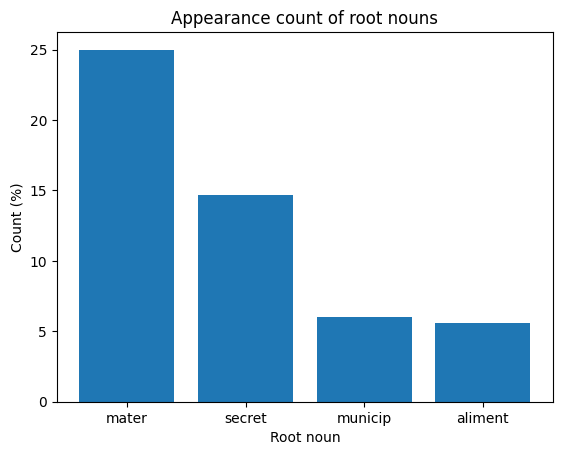

In [29]:
# Bar plot das distribuições baseadas no tamanho da coluna de descrições

df_column_size = len(licitacoes_2016_compras['DS_OBJETO'])
labels = list(grouped_nouns_and_counts.keys())
values = [(v / df_column_size) * 100 for v in grouped_nouns_and_counts.values()]

fig, ax = plt.subplots()
ax.bar(labels, values)

# Add the title and labels
ax.set_title("Appearance count of root nouns")
ax.set_xlabel("Root noun")
ax.set_ylabel("Count (%)")

# Show the plot
plt.show()

#### levando em consideração os resultados apresentados, percebe-se que essas palavras-chave ocupam aproximadamente 50% do total de descrições de licitações. Logo, é possível afirmar que essas palavras-chave são as mais relevantes para a análise. A seguir, analisarei as distribuições de frequências para cada uma dessas palavras-chave por meio da função value_counts.

##### material

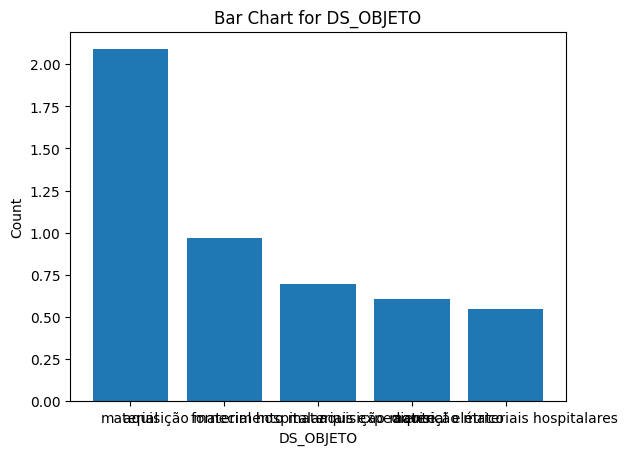

In [14]:
# material
from my_library import plot_bar_chart_for_filtered_df
filtro = licitacoes_2016_compras['DS_OBJETO'].str.contains('mater')

plot_bar_chart_for_filtered_df(licitacoes_2016_compras, filtro, 'DS_OBJETO')
# pelos nomes estão impossíveis de ler, então vou deixar a legenda logo abaixo

In [15]:
licitacoes_2016_compras[filtro]['DS_OBJETO'].value_counts()

material                                                                                                                                     69
aquisição material hospitalar                                                                                                                32
fornecimento materiais expediente .                                                                                                          23
aquisição material elétrico                                                                                                                  20
aquisição materiais hospitalares                                                                                                             18
                                                                                                                                             ..
constitui objeto presente licitação contratação empresa fornecimento material elétrico eletrônico utilizado iluminação pública município

##### secretaria

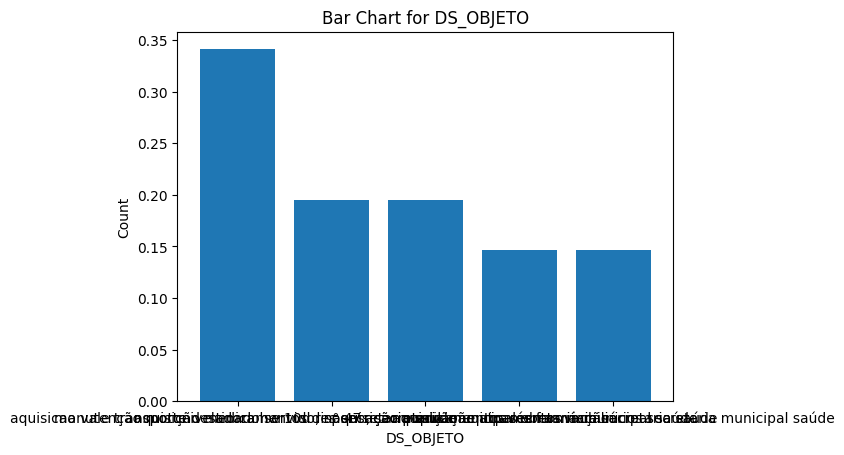

In [16]:
# secretaria
filtro = licitacoes_2016_compras['DS_OBJETO'].str.contains('secret')

plot_bar_chart_for_filtered_df(licitacoes_2016_compras, filtro, 'DS_OBJETO')

In [17]:
licitacoes_2016_compras[filtro]['DS_OBJETO'].value_counts()

aquisicao vale transporte destinado servidores secretaria saude .                                                                                                                           7
manutenção motoniveladora hw 10d , n° 47 , secretaria municipal obras viação                                                                                                                4
aquisição medicamentos dispensação população através farmácia secretaria saúde                                                                                                              4
aquisiçao medicamentos secretaria municipal saúde .                                                                                                                                         3
aquisição equipamentos mobiliários secretaria municipal saúde                                                                                                                               3
                                                  

##### alimentos

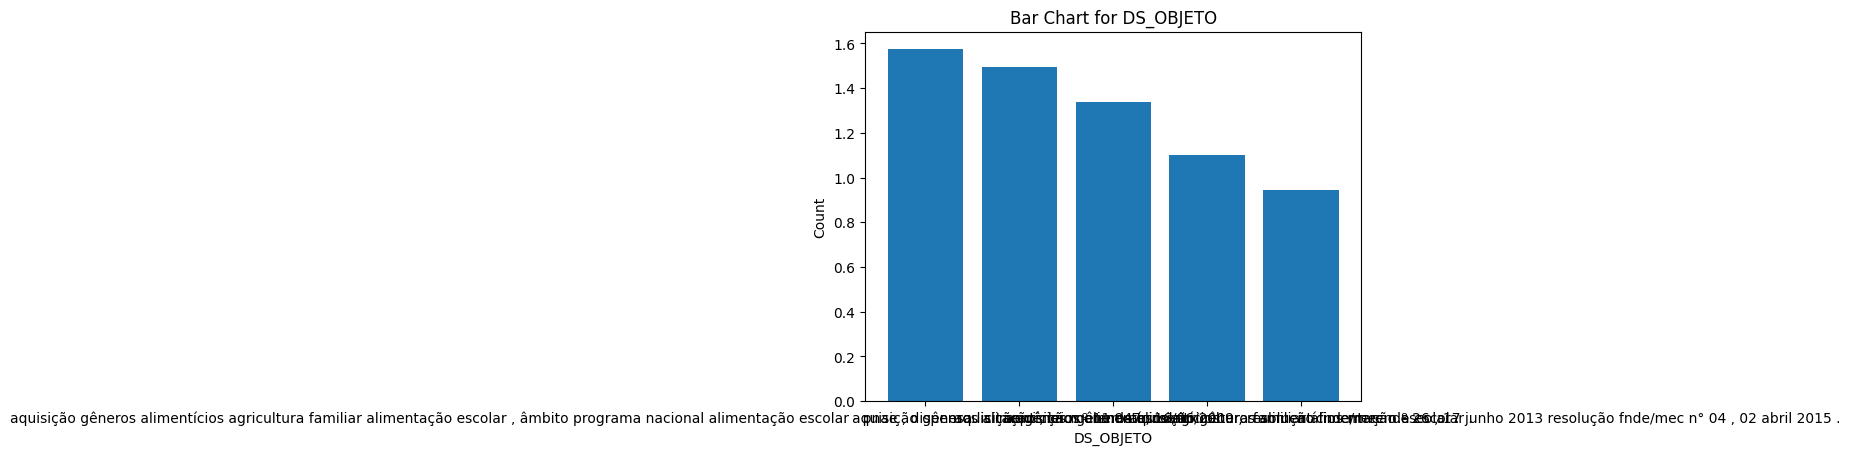

In [18]:
# alimentos
filtro = licitacoes_2016_compras['DS_OBJETO'].str.contains('aliment')

plot_bar_chart_for_filtered_df(licitacoes_2016_compras, filtro, 'DS_OBJETO')

In [19]:
licitacoes_2016_compras[filtro]['DS_OBJETO'].value_counts()

aquisição gêneros alimentícios agricultura familiar alimentação escolar , âmbito programa nacional alimentação escolar - pnae , dispensa licitação , lei n.º 11.947 , 16/06/2009 , resolução fnde/mec n.º 26 , 17 junho 2013 resolução fnde/mec n° 04 , 02 abril 2015 .    20
aquisição gêneros alimentícios merenda escolar                                                                                                                                                                                                                             19
aquisição gêneros alimentícios                                                                                                                                                                                                                                             17
aquisição gêneros alimentícios agricultura familiar alimentação escolar .                                                                                                                     

##### municipal

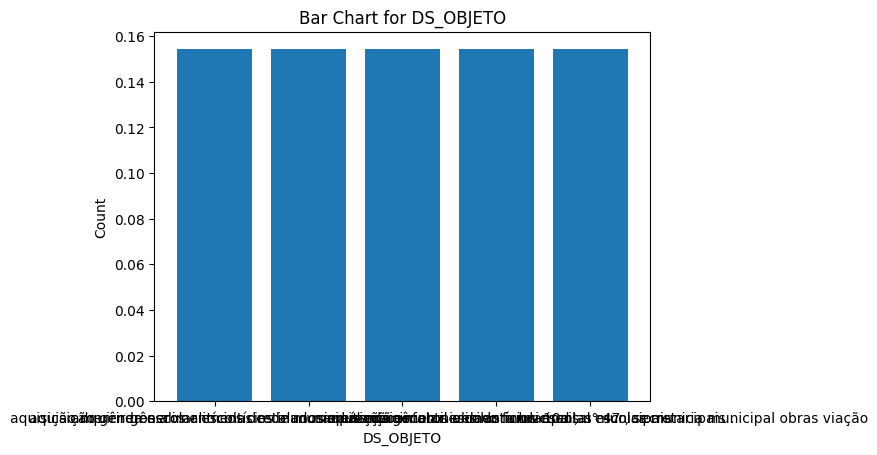

In [20]:
# municipal
filtro = licitacoes_2016_compras['DS_OBJETO'].str.contains('municip')

plot_bar_chart_for_filtered_df(licitacoes_2016_compras, filtro, 'DS_OBJETO')

In [21]:
licitacoes_2016_compras[filtro]['DS_OBJETO'].value_counts()

aquisição merenda escolar escolas rede municipál ensino .                                                                                                                                                                 4
aquisição gêneros alimentícios destinados merenda escolar escolas municipais .                                                                                                                                            4
adquirir gêneros alimentícios alunos educação infantil ensino fundamental escolas municipais .                                                                                                                            4
aquisição gêneros alimentícios escolas municipais                                                                                                                                                                         4
manutenção motoniveladora hw 10d , n° 47 , secretaria municipal obras viação                                            

### Agora, irei analisar o comportamento dos órgãos licitantes em relação ao valor total licitado. Para isso, irei agrupar os órgãos por valor total licitado e plotar um gráfico de barras.

In [ ]:
licitacoes_2016_compras['NM_ORGAO'].value_counts()

In [22]:
licitacoes_2016_compras.groupby(['CD_ORGAO','NM_ORGAO'])['VL_LICITACAO'].sum().sort_values(ascending=False).head(10)

CD_ORGAO  NM_ORGAO                                     
72600     PM DE TUPANDI                                    7.920721e+08
88258     CONS. PÚBL. DO EXTREMO SUL                       4.934806e+08
63000     PM DE VIAMÃO                                     4.207760e+08
44500     PM DE CANOAS                                     2.162334e+08
88190     CONS. INTERM. DE SAÚDE DO VALE DO RIO TAQUARI    8.848445e+07
44100     PM DE CANDELÁRIA                                 6.328564e+07
88040     PM DE PINTO BANDEIRA                             4.693599e+07
53500     PM DE OSÓRIO                                     4.149728e+07
66700     PM DE ELDORADO DO SUL                            3.872748e+07
88261     FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO          3.619250e+07
Name: VL_LICITACAO, dtype: float64

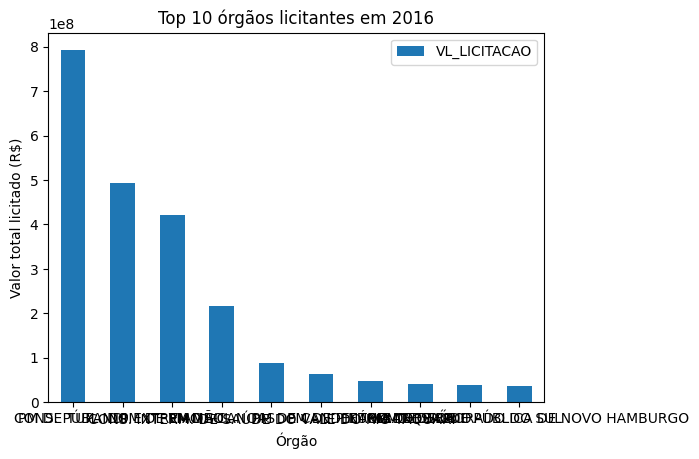

In [27]:
# plotando o gráfico de barras

top_10_orgaos = licitacoes_2016_compras.groupby(['CD_ORGAO','NM_ORGAO'])['VL_LICITACAO'].sum().sort_values(ascending=False).head(10).reset_index()

top_10_orgaos.plot.bar(x='NM_ORGAO', y='VL_LICITACAO', rot=0)

plt.title('Top 10 órgãos licitantes em 2016')
plt.xlabel('Órgão')
plt.ylabel('Valor total licitado (R$)')

plt.show()

### Agora, irei analisar o comportamento das licitações. Quanto tempo elas tendem a demorar para serem homologadas? Quanto tempo elas tendem a demorar para serem adjudicadas? Quanto tempo elas tendem a demorar para serem abertas? Quanto tempo elas tendem a demorar para serem encerradas?

In [12]:
# convertendo as colunas de datas para datetime e removendo as linhas que não possuem data de homolgação
filter = ~licitacoes_2016_compras['DT_HOMOLOGACAO'].str.contains('Não') & ~licitacoes_2016_compras['DT_ADJUDICACAO'].str.contains('Não')

datetimes_licitacoes = licitacoes_2016_compras[['DT_ABERTURA', 'DT_HOMOLOGACAO', 'DT_ADJUDICACAO']][filter]

In [13]:
datetimes_licitacoes

,DT_ABERTURA,DT_HOMOLOGACAO,DT_ADJUDICACAO
1,2016-01-22,2016-01-29,2016-01-29
2,2016-01-26,2016-02-01,2016-02-01
3,2016-02-02,2016-02-11,2016-02-11
5,2016-02-12,2016-02-15,2016-02-15
6,2016-01-25,2016-01-28,2016-01-28
...,...,...,...
30412,2016-04-12,2016-05-12,2016-05-12
30415,2016-12-13,2016-12-19,2016-12-19
30445,2016-12-06,2017-01-02,2017-01-02
30457,2016-07-22,2016-07-26,2016-07-26


In [14]:
datetimes_licitacoes['DT_ABERTURA'] = pd.to_datetime(datetimes_licitacoes['DT_ABERTURA'], format='%Y-%m-%d')

In [15]:
datetimes_licitacoes['DT_HOMOLOGACAO'] = pd.to_datetime(datetimes_licitacoes['DT_HOMOLOGACAO'], format='%Y-%m-%d')

In [16]:
datetimes_licitacoes['DT_ADJUDICACAO'] = pd.to_datetime(datetimes_licitacoes['DT_ADJUDICACAO'], format='%Y-%m-%d')

#### Tempo de abertura - homologação

In [17]:
from my_library import calculate_working_days
def calculate_working_days_column(col1, col2):
    return calculate_working_days(col1, col2)

datetimes_licitacoes['tempo_abertura_homologacao'] = datetimes_licitacoes.apply(lambda x: calculate_working_days_column(x['DT_ABERTURA'], x['DT_HOMOLOGACAO']), axis=1)

In [18]:
datetimes_licitacoes['tempo_abertura_homologacao'].describe()

count    9174.000000
mean       10.218443
std        19.809174
min         0.000000
25%         2.000000
50%         5.000000
75%        11.000000
max       556.000000
Name: tempo_abertura_homologacao, dtype: float64

##### É possível observar que existe uma diferença média de 10 dias, porém, o desvio padrão é de 20 dias, o que indica que há uma grande variação nos tempos de homologação. A fim de evitar a influencia de outliers, podemos levantar a hipótese de que os tempos de homologação estejam de acordo com a mediana(50%), que é de 5 dias.

#### Tempo de homologação - adjudicação

In [19]:
datetimes_licitacoes['tempo_homologacao_adjudicacao'] = datetimes_licitacoes.apply(lambda x: calculate_working_days_column(x['DT_HOMOLOGACAO'], x['DT_ADJUDICACAO']), axis=1)

In [20]:
datetimes_licitacoes['tempo_homologacao_adjudicacao'].describe()

count    9174.00000
mean        0.93656
std         2.98773
min         0.00000
25%         1.00000
50%         1.00000
75%         1.00000
max       261.00000
Name: tempo_homologacao_adjudicacao, dtype: float64

##### Já o tempo de adjudicação é bem menor, com uma média de 1 dia e um desvio padrão de 3 dias. A mediana é de 1 dia, o que indica que a maioria dos tempos de adjudicação estão de acordo com a mediana.

### Agora, irei analisar as licitações pelas estações do ano. Quais são as estações do ano com mais licitações?

In [21]:
# Aplicando a função de classificação de estação do ano
from my_library import get_season

datetimes_licitacoes['estacao'] = datetimes_licitacoes['DT_ABERTURA'].apply(lambda x: get_season(x))

In [22]:
datetimes_licitacoes['estacao'].value_counts()

Inverno      3766
Primavera    2473
Outono       1744
Verão        1191
Name: estacao, dtype: int64

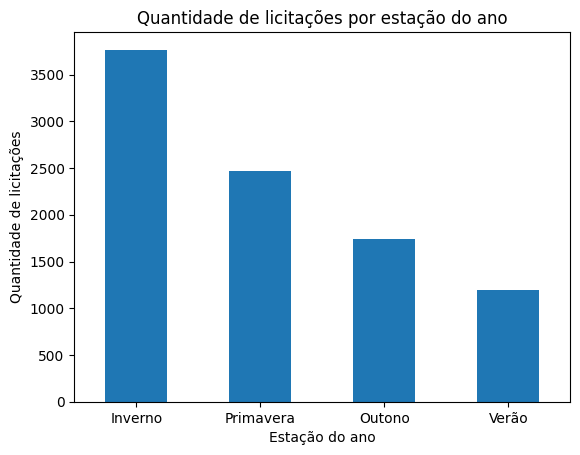

In [23]:
# plotando o gráfico de barras

datetimes_licitacoes['estacao'].value_counts().plot.bar(rot=0)

plt.title('Quantidade de licitações por estação do ano')
plt.xlabel('Estação do ano')
plt.ylabel('Quantidade de licitações')

plt.show()

In [30]:
datetimes_licitacoes[['NM_ORGAO', 'VL_LICITACAO']] = licitacoes_2016_compras[['NM_ORGAO','VL_LICITACAO']]

In [47]:
datetimes_licitacoes.groupby('estacao')['NM_ORGAO'].value_counts()

estacao  NM_ORGAO               
Inverno  PM DE NOVO HAMBURGO        57
         PM DE CACHOEIRA DO SUL     55
         PM DE PELOTAS              55
         PM DE GUAPORÉ              48
         PM DE ERECHIM              47
                                    ..
Verão    PM DE TUPANCIRETÃ           1
         PM DE UNIÃO DA SERRA        1
         PM DE VESPASIANO CORRÊA     1
         PM DE ÁGUA SANTA            1
         PM DE ÁUREA                 1
Name: NM_ORGAO, Length: 1608, dtype: int64

### Agora, irei analisar os itens licitados. Quais são os itens mais licitados? Quais são os itens mais caros? Quais são os itens mais baratos?

In [9]:
itens_2016['DS_ITEM'].value_counts()

MANGUEIRA SILICONE 2.1/2"              1360
MATERIAL                                873
LIVRO                                   355
.                                       344
NÃO CADASTRADO                          304
                                       ... 
Resina fotopolimerizavel , cor A3,5       1
Resina fotopolimerizavel cor:A3           1
Resina fotopolimerizavel, cor B2          1
Resina fotopolimerizável cor A2           1
Valproato de Sódio 500 mg                 1
Name: DS_ITEM, Length: 359635, dtype: int64

Por meio do resultado anterior é possível determinar algumas estratégias para a exploração de dados sobre os itens licitados.
Como por exemplo:
- Descrições que possuam a string 'mg'/'miligramas' ou 'ml'/'mililitros' podem ser relacionadas com medicamentos
- Mililitros podem ser confundidos como alimentos, itens de higiene e limpeza, etc
- Descrições que possuam unidades de medida como m², m³, etc podem ser relacionadas com materiais de construção
- Descrições que possuam a string 'kg'/'quilogramas' podem ser relacionadas com alimentos

In [10]:
itens_2016[itens_2016['DS_ITEM'].str.contains('mg', case = False)]['DS_ITEM'].value_counts()

FUROSEMIDA 40MG                                42
CARBAMAZEPINA 200MG                            41
FENOBARBITAL 100MG                             40
PREDNISONA 5MG                                 38
CEFALEXINA 500MG                               38
                                               ..
DIPIRONA 500 MG/ML SOLUÇÃO ORAL 10 ML           1
ENALAPRIL 20MG (EMBALAGEM HOSPITALAR)           1
ESPIRONOLACTONA 50MG (EMBALAGEM HOSPITALAR)     1
FENOBARBITAL 100 MG (EMBALAGEM HOSPITALAR)      1
Valproato de Sódio 500 mg                       1
Name: DS_ITEM, Length: 27872, dtype: int64

In [11]:
itens_2016[itens_2016['DS_ITEM'].str.contains('ml', case = False)]['DS_ITEM'].value_counts()

ÓLEO DE SOJA 900 ML                                                                                                                  21
OLEO DE SOJA 900 ML                                                                                                                  20
ÓLEO DE SOJA VEGETAL: garrafa de 900ml                                                                                               15
VINAGRE DE MAÇÃ: garrafa de 750ml                                                                                                    13
OLEO DE SOJA 900ML                                                                                                                   11
                                                                                                                                     ..
Cola gliter, não tóxica, composta por resinas de pva, gliter e conservante tipo benzoatiazol, embalagem de 35 ml, na cor prata        1
Cola gliter, não tóxica, composta por resinas de

In [60]:
itens_2016[itens_2016['DS_ITEM'].str.contains('m²', case = False)]['DS_ITEM'].value_counts()

Lote - área de 1,50x3,00m. Totalizando 4,50m². A área do imóvel será exclusivamente para uso de túmulos, capelas ou jazigos.                                                                                                                                                                                                                                            175
Papel oficio A4 - Cor Branco- gr 75 g/m²,embalagem  c/ 500 unid.                                                                                                                                                                                                                                                                                                         23
PLACA REFLETIVA TIPOII - R07 E R019 - ÁREA=0,51m²(VEL.MÁX-PROIB ULTR.)                                                                                                                                                                                                          

In [61]:
itens_2016[itens_2016['DS_ITEM'].str.contains('m³', case = False)]['DS_ITEM'].value_counts()

DESLOCAMENTO 65CM³ PRESSÃO DE TRABALHO 190BAR ACOPLAMENTO SAE B 13 Z C/ ACIONAMENTO PNEUMÁTICO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             12
TRANSPORTE COMERCIAL COM CAMINHÃO BASCULANTE 6M³, RODOVIA PAVIMENTADA                                                                                                                                                                                                                                                     

In [62]:
itens_2016[itens_2016['DS_ITEM'].str.contains('kg', case = False)]['DS_ITEM'].value_counts()

FRANGO (COXA E SOBRECOXA): congelado, embalagem de 1kg                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [64]:
itens_2016[itens_2016['DS_ITEM'].str.contains('gramas', case = False)]['DS_ITEM'].value_counts()

 Brócolis híbridos, boa qualidade, sem danificações e partes amarelas.  Cabeça compacta, cada unidade de 300 gramas.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Devido a enormosidade dos dados, irei aplicar uma função para calcular o tamanho de uma amostra de acordo com o tamanho da população e o erro máximo aceitável. Assim, será possível analisar os itens mais licitados, os mais caros e os mais baratos e suas respectivas frequências de forma mais eficiente.

#### Eu tentei aplicar a fórmula a seguir, cujo resultado retorna o tamanho da amostra para ser usada. Não deu muito certo com o problema proposto, mas segue a descrição:

$ n = \frac{(Z_{\alpha/2})^2 \cdot p \cdot (1 - p)}{E^2} $

- n é o tamanho da amostra
- Z_{\alpha/2} é o valor crítico de uma distribuição normal padrão para um nível de significância especificado (por exemplo, \alpha = 0,05)
- p é a proporção estimada da população que pertence à categoria de interesse
- E é o erro desejado da margem

A fórmula é usada para garantir que a amostra seja grande o suficiente para representar a população com uma margem de erro aceitável. Ao aumentar o tamanho da amostra, a margem de erro diminui. Ao contrário, ao diminuir o tamanho da amostra, a margem de erro aumenta.

In [10]:
from my_library import sample_df
# Como eu não sei a variabilidade, irei considerar buscar uma amostra entre 10% e 20% da população. Assim, conseguirei uma amostra de tamanho razoável.

itens_2016_sample = sample_df(itens_2016, 0.15)



[nltk_data] Downloading package punkt to /home/vlgi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vlgi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/vlgi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
itens_2016_sample['DS_ITEM'].value_counts()

MANGUEIRA SILICONE 2.1/2"                                                                                                                                                                                                                                     196
MATERIAL                                                                                                                                                                                                                                                      129
.                                                                                                                                                                                                                                                              58
LIVRO                                                                                                                                                                                                                             

#### Assim como nas licitações, é possível tratar os texto dos itens para extrair informações relevantes. Por exemplo, podemos extrair informações sobre a categoria do item, como alimentos, medicamentos, materiais de construção, etc. utilizando o pipeline e a função de classificação de texto desenvolvidos anteriormente.

In [12]:
from my_library import preprocess_text_pipeline

itens_2016_sample['DS_ITEM'] = itens_2016_sample['DS_ITEM'].apply(lambda x: preprocess_text_pipeline(x))

In [13]:
from my_library import get_most_common_nouns

itens_and_counts = get_most_common_nouns(itens_2016_sample, 'DS_ITEM', 100)

In [14]:
itens_and_counts

[('cor', 3336),
 ('%', 2809),
 ('cm', 2726),
 ('tipo', 2155),
 ('x', 2074),
 ('mm', 2051),
 ('mg', 1770),
 ('embalagem', 1759),
 ('unidades', 1746),
 ('data', 1744),
 ('kg', 1659),
 ('ml', 1485),
 ('tamanho', 1480),
 ('c/', 1480),
 ('caixa', 1378),
 ('produto', 1334),
 ('papel', 1333),
 ('pvc', 1289),
 ('meses', 1272),
 ('qualidade', 1245),
 ('aço', 1244),
 ('litros', 1192),
 ('validade', 1189),
 ('material', 1122),
 ('conforme', 1108),
 ('concreto', 1048),
 ('branca', 1040),
 ('cabo', 1009),
 ('branco', 961),
 ('g', 955),
 ('plástico', 952),
 ('mínimo', 946),
 ('pó', 922),
 ('m', 920),
 ('base', 910),
 ('–', 907),
 ('serviço', 882),
 ('pneu', 863),
 ('médio', 862),
 ('ano', 855),
 ('serviços', 830),
 ('verde', 822),
 ('preto', 818),
 ('cada', 816),
 ('fabricação', 809),
 ('tubo', 801),
 ('placa', 756),
 ('tinta', 740),
 ('gramas', 713),
 ('azul', 712),
 ('madeira', 708),
 ('peso', 706),
 ('transparente', 701),
 ('instalação', 693),
 ('+', 692),
 ('sistema', 680),
 ('p/', 679),
 ('pint

#### Ao examinar o resultado obtido e descartar palavras como unidades de medida, ou símbolos especiais, é possível averiguar que a maioria dos itens está distribuído em material escolar  e materiais de construção. Também estão descritos materiais como um geral.

#### Sendo assim, irei novamente elencar os itens mais presentes e assim fazer uma relação com os órgãos, além de comparar diferenças no valor unitário e o homologado.
Palavras elencadas:
- caixa
- papel
- pvc
- aço
- concreto

In [33]:
itens_2016_sample = pd.merge(itens_2016_sample, licitacoes_2016_compras, on='CD_ORGAO')

##### Mas antes de prosseguir, irei verificar a quantidade de itens licitados por órgão e o valor médio unitário homologado.

In [52]:
itens_2016_sample.groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE CANOAS                              4.536532e+09
PM DE NOVO HAMBURGO                       1.415630e+09
PM DE VIAMÃO                              1.280068e+09
PM DE CAXIAS DO SUL                       8.793883e+08
PM DE ERECHIM                             7.247431e+08
                                              ...     
INST. PREV. SERV. PUBL. MUNIC. DE IJUÍ    1.000000e+00
POLÍCIA CIVIL                             1.000000e+00
PREV-XANGRI-LÁ                            1.000000e+00
CIA. RIOGRANDENSE DE SANEAMENTO           1.000000e+00
PM DE BAGÉ                                1.000000e+00
Name: QT_ITENS, Length: 546, dtype: float64

In [64]:
itens_2016_sample.groupby('NM_ORGAO')['VL_UNITARIO_HOMOLOGADO'].mean().sort_values(ascending=False)

NM_ORGAO
PM DE PASSO DO SOBRADO                                  279780.605000
PM DE DOIS IRMÃOS DAS MISSÕES                           165983.750000
PM DE TAQUARI                                            29755.161081
PM DE PIRATINI                                           28318.024667
PM DE PORTO ALEGRE                                       27905.380000
                                                            ...      
CM DE SALTO DO JACUÍ                                         0.000000
CM DE PORTÃO                                                 0.000000
CM DE HUMAITÁ                                                0.000000
CM DE GIRUÁ                                                  0.000000
AGÊNCIA REGULADORA DOS SERV. PÚBL. MUNIC. DE ERECHIM         0.000000
Name: VL_UNITARIO_HOMOLOGADO, Length: 546, dtype: float64

In [55]:
itens_2016_sample['VL_DIFF'] = itens_2016_sample['VL_HOMOLOGADO'] - itens_2016_sample['VL_UNITARIO_HOMOLOGADO']

In [62]:
itens_2016_sample.groupby('NM_ORGAO')['VL_DIFF'].sum().sort_values()
# Muitos órgãos que tiveram prejuízos em licitações. Ou seja, o valor homologado foi menor que o valor unitário homologado.

NM_ORGAO
PM DE PELOTAS                                     -7.586256e+08
PM DE GUAÍBA                                      -2.871192e+08
PM DE ERECHIM                                     -2.741069e+08
PM DE CHARQUEADAS                                 -1.236008e+08
DEP. DE ÁGUA E ESGOTOS - SANT'ANA DO LIVRAMENTO   -1.042792e+08
                                                       ...     
FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO            8.672943e+09
PM DE SÃO JOSÉ DO NORTE                            1.001807e+10
CIA. DE DESENV. DE CAXIAS DO SUL                   1.723064e+10
PM DE CAXIAS DO SUL                                2.953772e+10
PM DE VIAMÃO                                       1.272242e+12
Name: VL_DIFF, Length: 546, dtype: float64

#### Agora, irei analisar os itens licitados baseados nas palavras elencadas.

In [65]:
itens_2016_sample['DS_ITEM'].value_counts()

mangueira silicone 2.1/2 ''                                                                                 14896
material                                                                                                     7482
serviço                                                                                                      3491
cfe edital                                                                                                   2808
lote - área 1,50x3,00m . totalizando 4,50m² . área imóvel exclusivamente uso túmulos , capelas jazigos .     1775
                                                                                                            ...  
impermeabilizacao hidroasfalto 4 demaos                                                                         1
serviço reforma embuchamento articulação                                                                        1
luva látex p/ procedimento tamanho p : caixa c/ 100 luvas                               

In [68]:
itens_2016_sample[itens_2016_sample['DS_ITEM'].str.contains('caixa', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE CANOAS                                47669154.0
PM DE SAPUCAIA DO SUL                       42004200.0
PM DE NOVA BASSANO                          21774608.0
PM DE PELOTAS                                9303229.6
PM DE ERECHIM                                5255380.0
                                               ...    
PM DE NOVO XINGU                                   8.0
CM DE MINAS DO LEÃO                                8.0
PM DE SÃO JOSÉ DO SUL                              6.0
PM DE LAGOA BONITA DO SUL                          6.0
INST. PREV. ASSIST. SERV. MUN. DE CANOAS           4.0
Name: QT_ITENS, Length: 346, dtype: float64

In [69]:
itens_2016_sample[itens_2016_sample['DS_ITEM'].str.contains('papel', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE CANOAS                               137072098.0
PM DE ELDORADO DO SUL                       31553911.0
PM DE CAXIAS DO SUL                         24585660.0
PM DE FAXINAL DO SOTURNO                    14000000.0
FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO     10858000.0
                                              ...     
PM DE SÃO PEDRO DO SUL                            15.0
PM DE VANINI                                      14.0
PM DE SÃO JOSÉ DO SUL                              6.0
PM DE TORRES                                       6.0
PM DE BOM PRINCÍPIO                                0.0
Name: QT_ITENS, Length: 297, dtype: float64

In [70]:
itens_2016_sample[itens_2016_sample['DS_ITEM'].str.contains('pvc', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE PELOTAS                                      5999523.04
PM DE CAXIAS DO SUL                                5005908.00
PM DE VIAMÃO                                       2952400.00
SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL      2606149.00
PM DE SÃO FRANCISCO DE PAULA                       1958750.00
                                                      ...    
PM DE SENTINELA DO SUL                                  17.00
CM DE PALMEIRA DAS MISSÕES                              16.00
INST. PREV. ASSIST. MUN. - CAXIAS DO SUL                11.00
CONS. INTERM. SAÚDE DO NOROESTE DO ESTADO DO RS         11.00
PM DE DEZESSEIS DE NOVEMBRO                              9.00
Name: QT_ITENS, Length: 233, dtype: float64

In [71]:
itens_2016_sample[itens_2016_sample['DS_ITEM'].str.contains('aço', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE CAXIAS DO SUL                          66968532.0
PM DE FARROUPILHA                            15002910.0
PM DE PELOTAS                                 7068528.6
PM DE VENÂNCIO AIRES                          1468800.0
PM DE ERECHIM                                 1377764.0
                                                ...    
PM DE MAÇAMBARÁ                                     7.0
CONS. INTERM. DO VALE DO JACUÍ - CI/JACUÍ           4.0
PM DE MAQUINÉ                                       2.0
CM DE GETÚLIO VARGAS                                2.0
CM DE PANAMBI                                       1.0
Name: QT_ITENS, Length: 338, dtype: float64

In [72]:
itens_2016_sample[itens_2016_sample['DS_ITEM'].str.contains('concreto', case = False)].groupby('NM_ORGAO')['QT_ITENS'].sum().sort_values(ascending=False)

NM_ORGAO
PM DE CANOAS                                      5480200.000
PM DE PELOTAS                                     4414924.276
PM DE ELDORADO DO SUL                             2353000.000
PM DE COTIPORÃ                                    2181334.070
PM DE AGUDO                                       1461653.200
                                                     ...     
DEPARTAMENTO DE ÁGUA, ARROIOS E ESGOTO DE BAGÉ          9.000
PM DE LINDOLFO COLLOR                                   6.000
PM DE NOVA ROMA DO SUL                                  6.000
PM DE GRAMADO DOS LOUREIROS                             6.000
PM DE TENENTE PORTELA                                   5.700
Name: QT_ITENS, Length: 204, dtype: float64

In [74]:
from my_library import preprocess_text_pipeline

lotes_2016['DS_LOTE'] = lotes_2016['DS_LOTE'].apply(preprocess_text_pipeline)

In [76]:
from my_library import get_most_common_nouns

lotes_and_count = get_most_common_nouns(lotes_2016, 'DS_LOTE', 100)

### A análise por texto não foi muito efetiva, então procurarei saber qual tipo de modalidade predomina entre os órgãos.

In [80]:
lotes_2016 = pd.merge(lotes_2016, licitacoes_2016_compras, on='CD_ORGAO')

In [86]:
lotes_2016.groupby('NM_ORGAO')['CD_TIPO_MODALIDADE_x'].value_counts().sort_values(ascending=False)

NM_ORGAO                                                               CD_TIPO_MODALIDADE_x
PM DE ERECHIM                                                          PRP                     64124
CIA. CARRIS PORTO-ALEGRENSE                                            PRE                     62622
PM DE PELOTAS                                                          PRE                     61166
PM DE VIAMÃO                                                           PRE                     60512
PM DE MONTENEGRO                                                       PRE                     58203
                                                                                               ...  
FUNDAÇÃO DE PREVIDÊNCIA COMPLEMENTAR DO SERV. PÚBLIC. DO ESTADO DO RS  PRD                         1
DEP. MUNICIPAL DE ENERGIA DE IJUÍ - DEMEI GERAÇÃO                      CNV                         1
FUNDAÇÃO DE PREVIDÊNCIA COMPLEMENTAR DO SERV. PÚBLIC. DO ESTADO DO RS  RPO                         1

# Conclusões da Análise Exploratória de Dados (EDA)

A EDA foi realizada com o objetivo de compreender a estrutura e as características dos dados. Aqui estão algumas das principais conclusões:

## Distribuição de Variáveis

- A distribuição de tal variável mostra que a maioria dos dados está concentrada em um determinado tipo de órgão - Policias Militares e que no inverno ocorreram muito mais pedidos de licitações


## Correlação entre Variáveis

- Não foi possível estabelecer uma clara correlação entre as variáveis devido ao enorme número de features, o que dificultou bastante a leitura da matriz.

## Valores Ausentes

- Tal variável apresenta uma quantidade significativa de valores ausentes, o que pode afetar a precisão das análises futuras. É importante decidir como lidar com esses valores ausentes a fim de ter um ótimo processamento de texto
## Conclusão

Em geral, a EDA forneceu uma visão geral do conjunto de dados e destacou algumas questões que precisam ser abordadas antes de continuar com as análises. A EDA também ajudou a identificar as variáveis que precisam ser exploradas mais a fundo em análises futuras.
